# Importing Needed packages

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so
%matplotlib inline


In [17]:
!pip install seaborn
!pip install seaborn[stats]


# Reading the data in

In [4]:
df = pd.read_csv('globalterrorismdb_0718dist.csv',encoding= "ISO-8859-1")

# take a look at the dataset
df.head()

C:\Users\kshit\AppData\Local\Temp\ipykernel_11548\3939536779.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('globalterrorismdb_0718dist.csv',encoding= "ISO-8859-1")


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.shape

(181691, 135)

In [6]:
#pre-processing
null_sum=(df.isnull().sum()/len(df))*100
percent_null=null_sum.sort_values(ascending=False)
type(percent_null)
high_null_column=percent_null[percent_null>=50]
less_than_50_null_column=percent_null[~percent_null.isin(high_null_column)]
print(f'Number of column where null value less than fifty percent {len(less_than_50_null_column)}')
less_null_column=less_than_50_null_column.index.to_list()
print(less_null_column)

Number of column where null value less than fifty percent 58
['nperps', 'nperpcap', 'nwoundte', 'weapdetail', 'nkillter', 'scite1', 'summary', 'claimed', 'nwoundus', 'nkillus', 'corp1', 'weapsubtype1', 'weapsubtype1_txt', 'nwound', 'targsubtype1', 'targsubtype1_txt', 'nkill', 'longitude', 'latitude', 'natlty1', 'natlty1_txt', 'target1', 'city', 'provstate', 'guncertain1', 'ishostkid', 'specificity', 'doubtterr', 'multiple', 'crit1', 'iyear', 'iday', 'imonth', 'targtype1_txt', 'gname', 'individual', 'dbsource', 'country', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY', 'extended', 'region_txt', 'country_txt', 'region', 'crit2', 'targtype1', 'weaptype1', 'weaptype1_txt', 'attacktype1_txt', 'attacktype1', 'vicinity', 'suicide', 'success', 'crit3', 'property', 'eventid']


In [7]:
new_df=df[less_null_column]
check=new_df.columns.to_list()

In [8]:
selected_columns_1=['eventid', 'iyear', 'imonth', 'iday','country_txt','region_txt','city','multiple', 'success', 'suicide', 
 'attacktype1_txt', 'targtype1_txt',  'targsubtype1_txt', 'corp1', 'target1', 'natlty1_txt', 'weaptype1_txt','nkill','nwoundus', 'claimed', 'individual', 'INT_LOG', 'doubtterr', 'INT_MISC', 'specificity','gname', 'ishostkid', 'INT_ANY', 'guncertain1', 'provstate']
len(check)-len(selected_columns_1)

28

In [9]:
print(list((set(check)) - (set(selected_columns_1))))

['natlty1', 'crit1', 'nwound', 'nwoundte', 'crit3', 'longitude', 'dbsource', 'crit2', 'nperps', 'INT_IDEO', 'targtype1', 'targsubtype1', 'extended', 'region', 'nperpcap', 'nkillus', 'country', 'vicinity', 'nkillter', 'attacktype1', 'weapdetail', 'property', 'weapsubtype1_txt', 'scite1', 'weaptype1', 'summary', 'latitude', 'weapsubtype1']


In [10]:
df1=df[selected_columns_1]
df1.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,city,multiple,success,suicide,...,individual,INT_LOG,doubtterr,INT_MISC,specificity,gname,ishostkid,INT_ANY,guncertain1,provstate
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,0.0,1,0,...,0,0,0.0,0,1.0,MANO-D,0.0,0,0.0,NaN
1,197000000002,1970,0,0,Mexico,North America,Mexico city,0.0,1,0,...,0,0,0.0,1,1.0,23rd of September Communist League,1.0,1,0.0,Federal
2,197001000001,1970,1,0,Philippines,Southeast Asia,Unknown,0.0,1,0,...,0,-9,0.0,1,4.0,Unknown,0.0,1,0.0,Tarlac
3,197001000002,1970,1,0,Greece,Western Europe,Athens,0.0,1,0,...,0,-9,0.0,1,1.0,Unknown,0.0,1,0.0,Attica
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,0.0,1,0,...,0,-9,-9.0,1,1.0,Unknown,0.0,1,0.0,Fukouka


In [11]:
df1.T

,0,1,2,3,4,5,6,7,8,9,...,181681,181682,181683,181684,181685,181686,181687,181688,181689,181690
eventid,197000000001,197000000002,197001000001,197001000002,197001000003,197001010002,197001020001,197001020002,197001020003,197001030001,...,201712310016,201712310017,201712310018,201712310019,201712310020,201712310022,201712310029,201712310030,201712310031,201712310032
iyear,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
imonth,7,0,1,1,1,1,1,1,1,1,...,12,12,12,12,12,12,12,12,12,12
iday,2,0,0,0,0,1,2,2,2,3,...,31,31,31,31,31,31,31,31,31,31
country_txt,Dominican Republic,Mexico,Philippines,Greece,Japan,United States,Uruguay,United States,United States,United States,...,Philippines,Italy,Afghanistan,India,Afghanistan,Somalia,Syria,Philippines,India,Philippines
region_txt,Central America & Caribbean,North America,Southeast Asia,Western Europe,East Asia,North America,South America,North America,North America,North America,...,Southeast Asia,Western Europe,South Asia,South Asia,South Asia,Sub-Saharan Africa,Middle East & North Africa,Southeast Asia,South Asia,Southeast Asia
city,Santo Domingo,Mexico city,Unknown,Athens,Fukouka,Cairo,Montevideo,Oakland,Madison,Madison,...,Shariff Aguak,Spinetoli,Kohistan district,Hungrum,Maymana,Ceelka Geelow,Jableh,Kubentog,Imphal,Cotabato City
multiple,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
success,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,0,0
suicide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
 (df1.isnull().sum()/len(df1))*100

eventid              0.000000
iyear                0.000000
imonth               0.000000
iday                 0.000000
country_txt          0.000000
region_txt           0.000000
city                 0.238867
multiple             0.000550
success              0.000000
suicide              0.000000
attacktype1_txt      0.000000
targtype1_txt        0.000000
targsubtype1_txt     5.709144
corp1               23.418882
target1              0.350045
natlty1_txt          0.858050
weaptype1_txt        0.000000
nkill                5.676120
nwoundus            35.611010
claimed             36.391456
individual           0.000000
INT_LOG              0.000000
doubtterr            0.000550
INT_MISC             0.000000
specificity          0.003302
gname                0.000000
ishostkid            0.097969
INT_ANY              0.000000
guncertain1          0.209146
provstate            0.231712
dtype: float64

# EDA


In [13]:
attack_per_year=df1['iyear'].value_counts()

##### Distribution of Terrorist Attacks Per Year

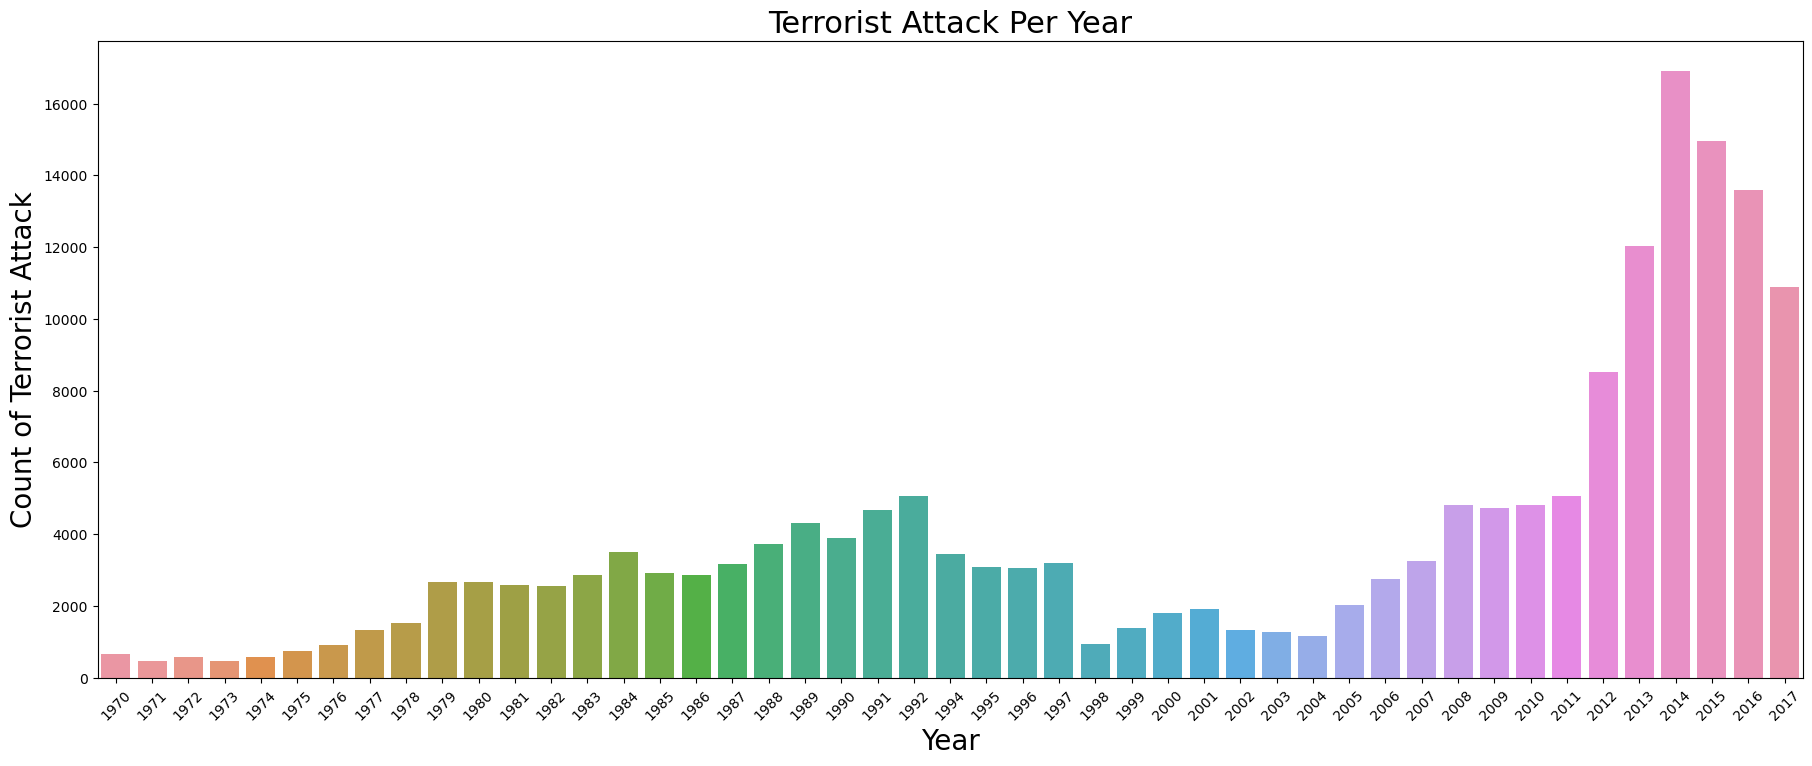

In [20]:
ax=plt.rcParams['figure.figsize'] = 22,8.27
ax=sns.countplot(x='iyear',data=df1)
ax.set_xlabel('Year',fontsize=20)
plt.xticks(rotation = 45)
ax.set_ylabel('Count of Terrorist Attack',fontsize=20)
ax.set_title('Terrorist Attack Per Year',fontsize=22);

##### Most Frequent Type of Attacks

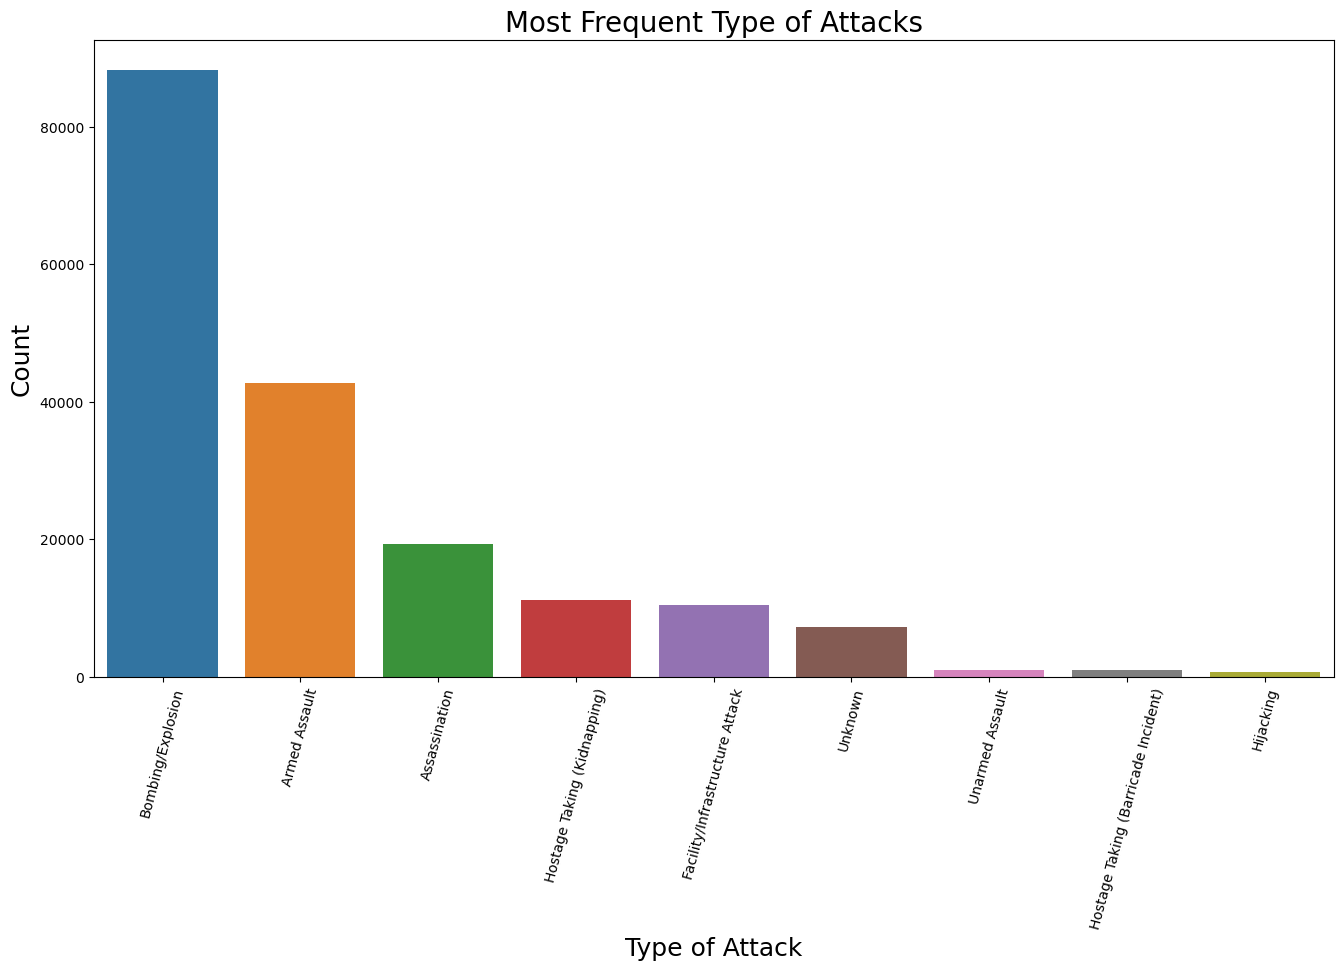

In [22]:
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.countplot(x='attacktype1_txt',data=df1,order = df1['attacktype1_txt'].value_counts().index)
ax.set_xlabel('Type of Attack',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Count',fontsize=18)
ax.set_title('Most Frequent Type of Attacks',fontsize=20);

In [23]:
df1['gname'].value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Ansar Sarallah                                          1
Sword of Islam                                          1
Support of Ocalan-The Hawks of Thrace                   1
Arab Revolutionary Front                                1
MANO-D                                                  1
Name: gname, Length: 3537, dtype: int64

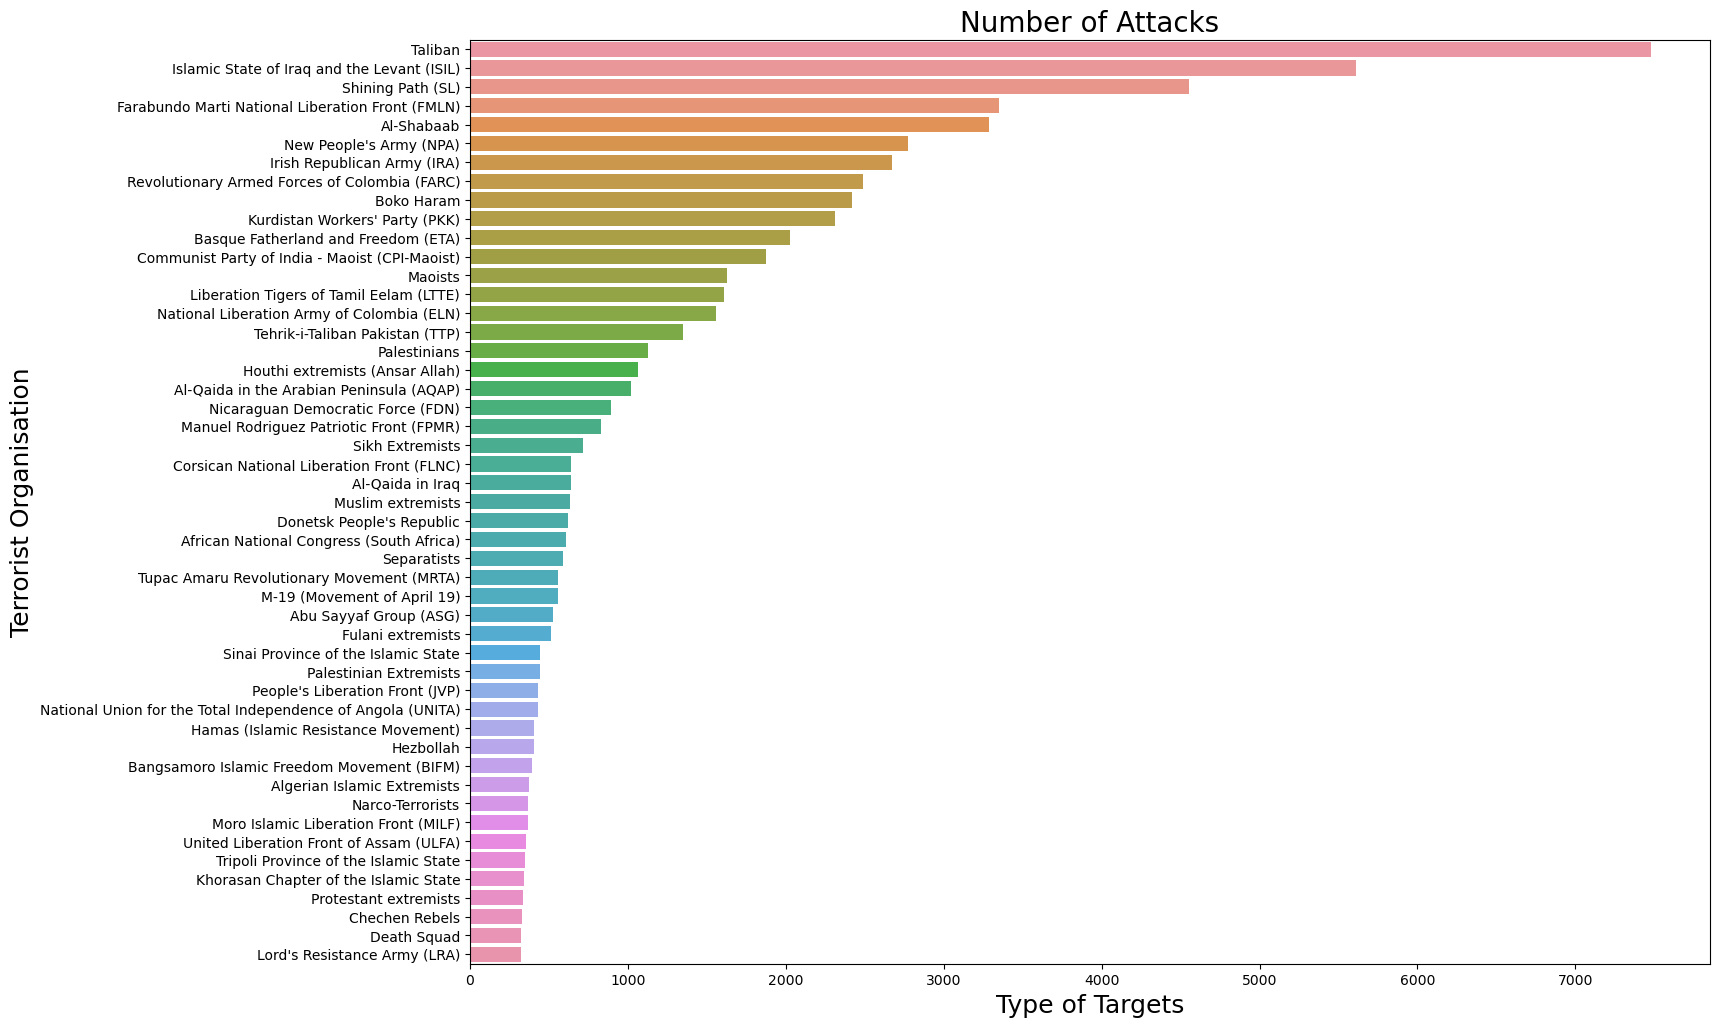

In [25]:
ax=plt.rcParams['figure.figsize'] = 16,12
ax=sns.countplot(y='gname',data=df1,order = df1['gname'].value_counts().index[1:50])
ax.set_xlabel('Type of Targets',fontsize=18)
# plt.yticks(rotation = 75)
ax.set_ylabel('Terrorist Organisation',fontsize=18)
ax.set_title('Number of Attacks',fontsize=20);

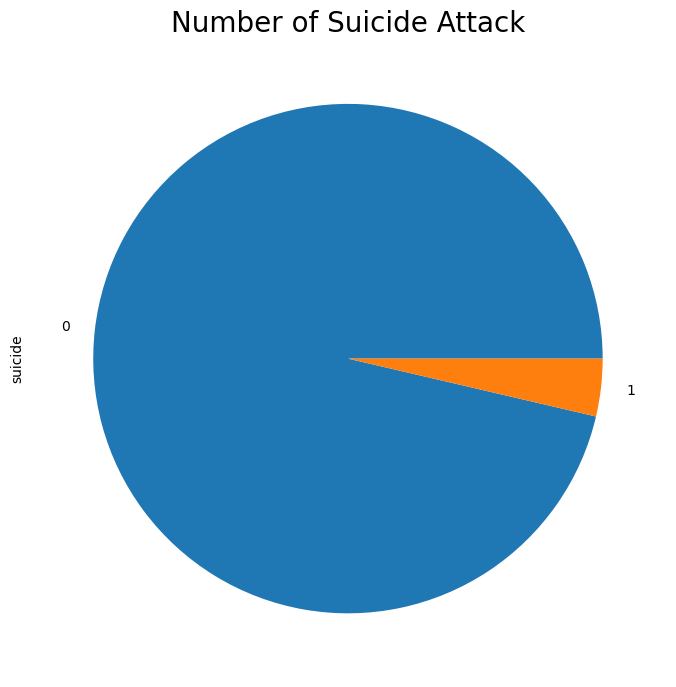

In [49]:
ax=df1['suicide'].value_counts().plot(kind='pie')
ax.set_title('Number of Suicide Attack',fontsize=20);
ax.tick_params(rotation=65)


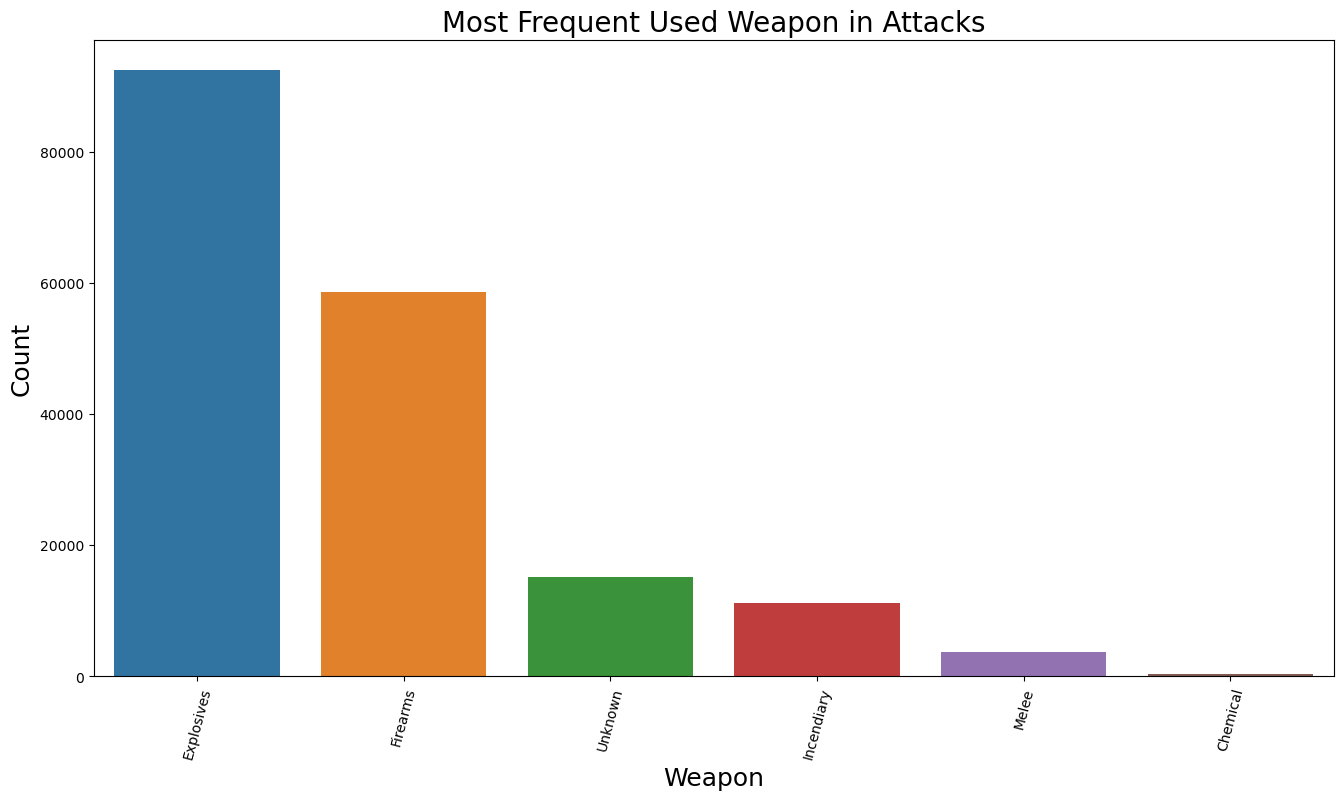

In [42]:

ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.countplot(x='weaptype1_txt',data=df1,order = df1['weaptype1_txt'].value_counts().index[:6])
ax.set_xlabel('Weapon',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Count',fontsize=18)
ax.set_title('Most Frequent Used Weapon in Attacks',fontsize=20);

In [45]:
print('\n')
print(('*')*20)
print('Value count of Object Type Category which if greater than 50')
print('\n')
print(('*')*20)
cat_col=df1.select_dtypes('object').columns.to_list()
for col in cat_col:
  if len(df1[col].value_counts())<50:
    print(df1[col].value_counts())
    print('\n')
    print(('*')*20)



********************
Value count of Object Type Category which if greater than 50


********************
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64


********************
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                          

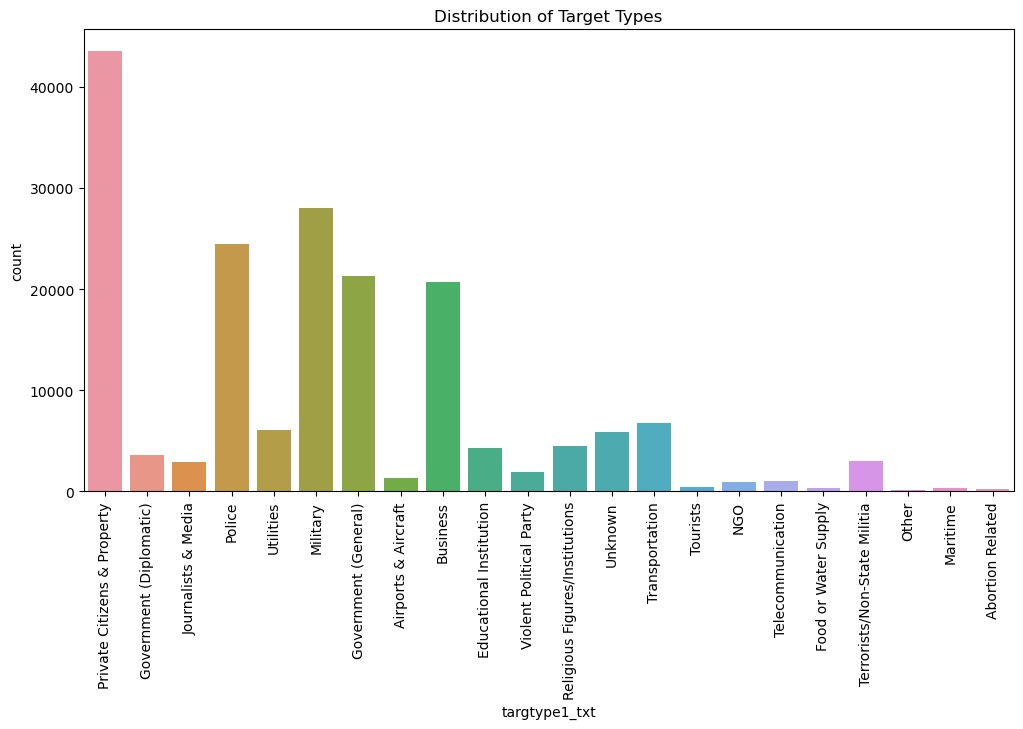

In [46]:
plt.figure(figsize=(12, 6))
sns.countplot(x='targtype1_txt', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Target Types')
plt.show()